In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
df = pd.read_csv('churn-bigml-80.csv')

### EDA

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

- 20 Columns
- 2666 Records
- Categorical features: International plan,voice mail plan
- Remaining all features are continous

In [5]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

- There are no null values in our dataset
- No need for imputation process

In [7]:
df.duplicated().any()

False

- No duplicates Present in dataset

# Visualizations

### UNI-VARIATE ANALYSIS

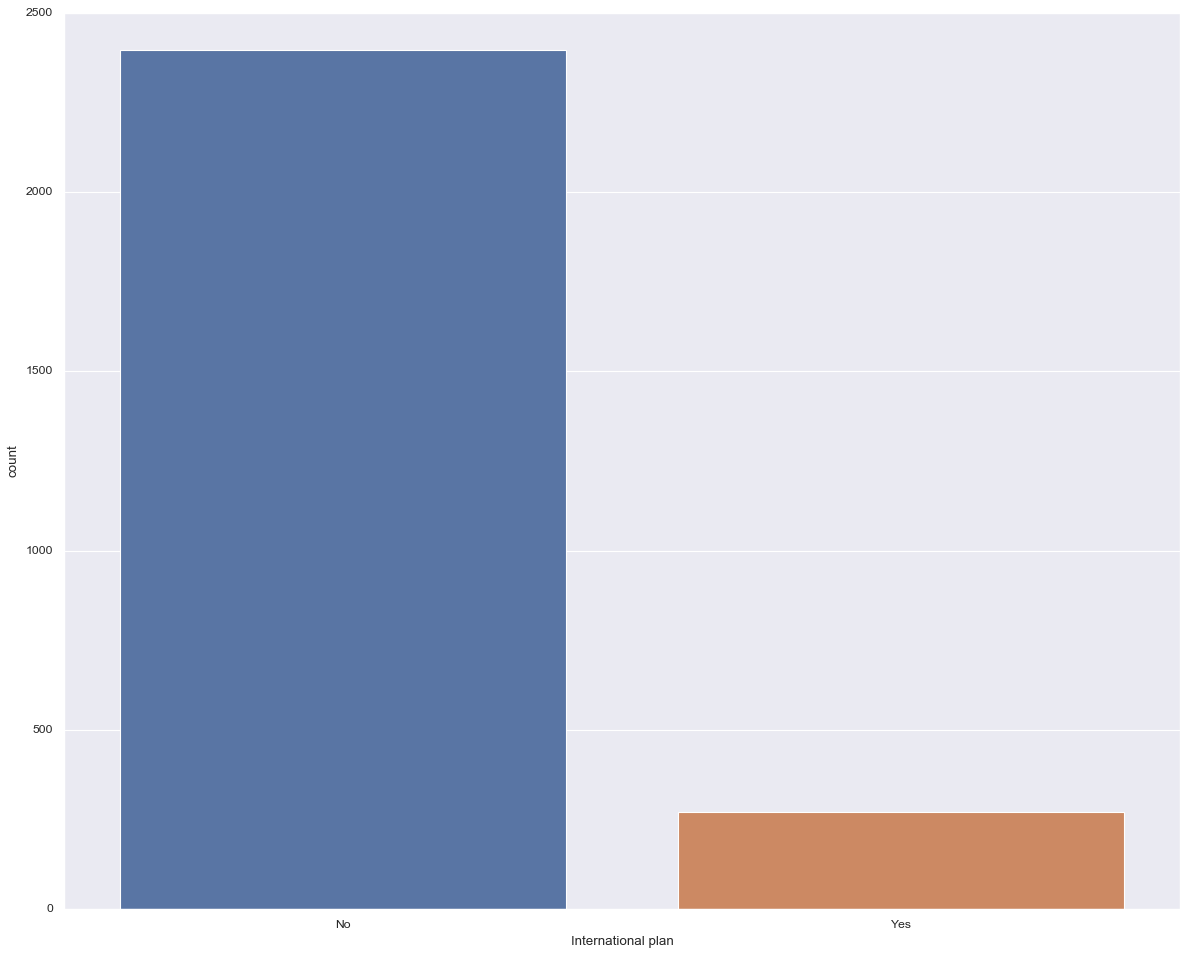

In [78]:
sns.countplot(data=df,x='International plan');

- Most of the customers didn't prefer international plan

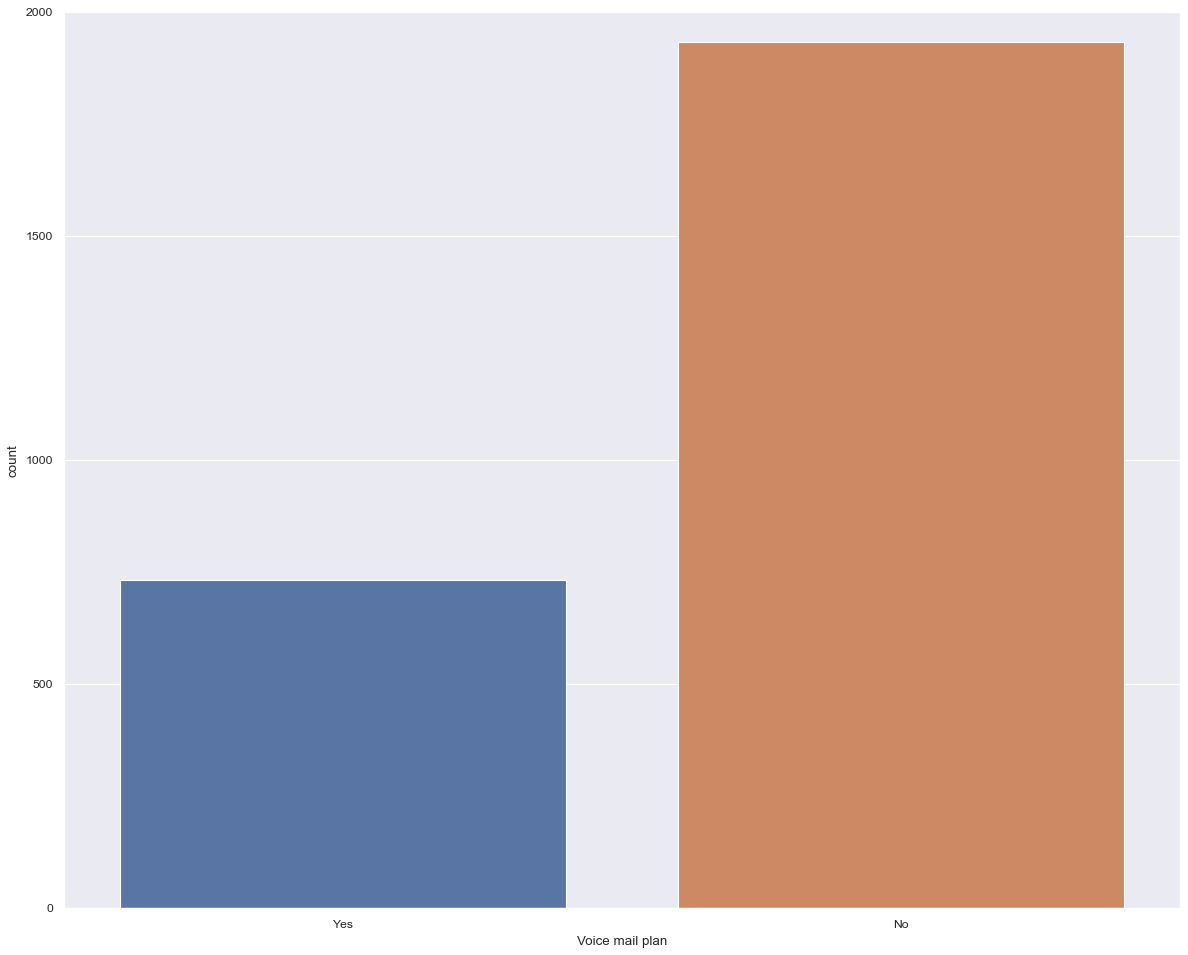

In [79]:
sns.countplot(data=df,x='Voice mail plan');

- 1/3rd Of customers only opted for voice mail plan

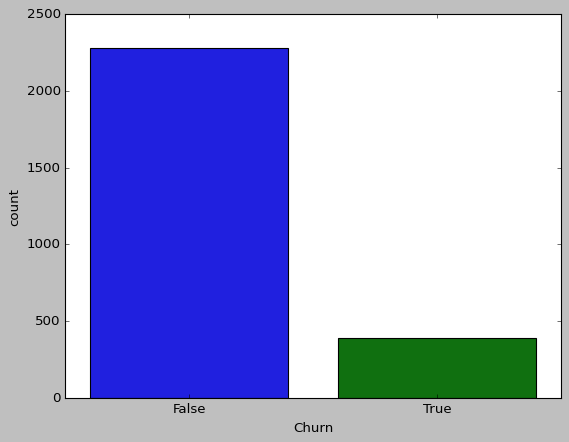

In [44]:
sns.countplot(data=df,x='Churn');

- 1/6th of the customer only leaves the service
- Thats a good news!

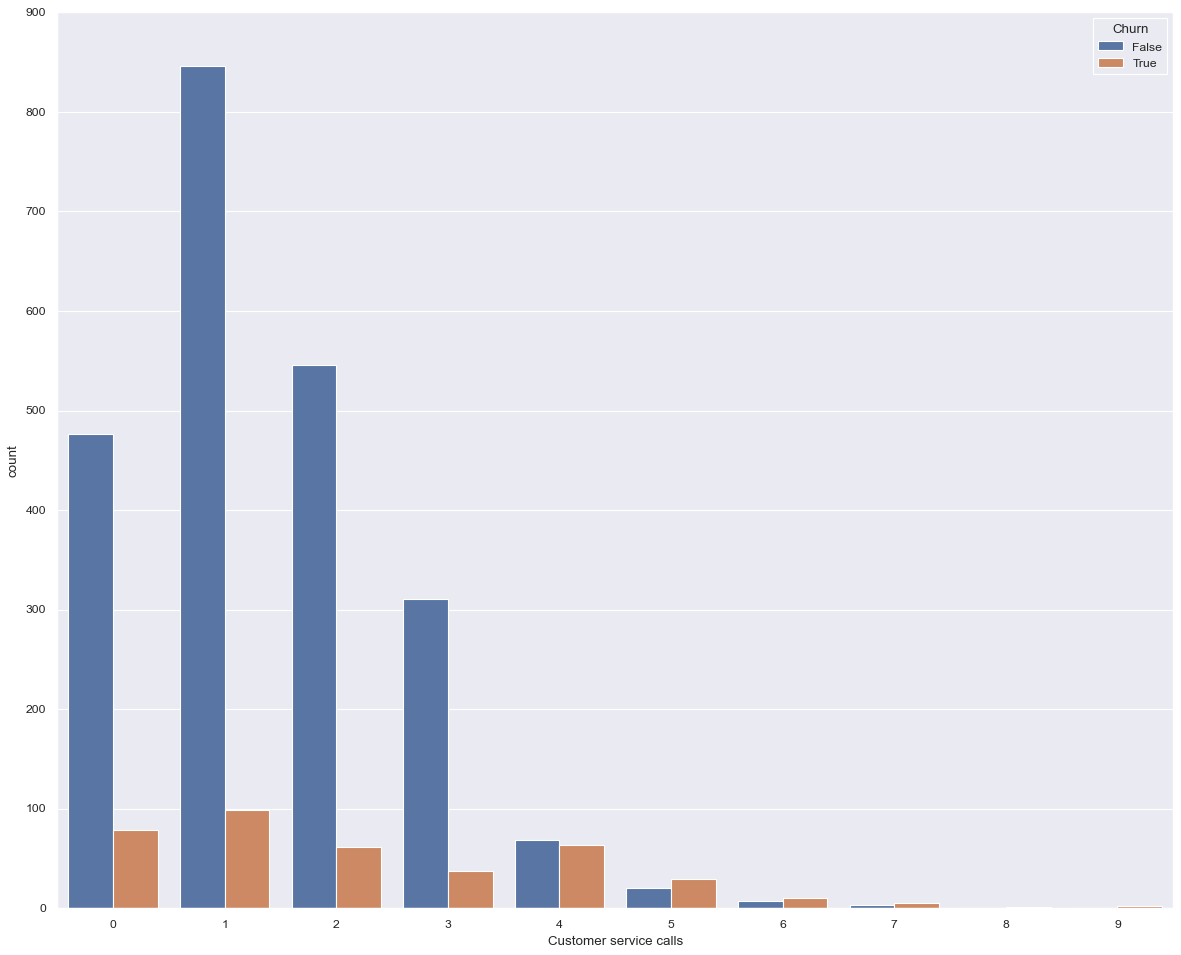

In [61]:
sns.countplot(data=df,x='Customer service calls',hue='Churn');

- Customers who make customer service calls more than 3 are more likely to leave the service

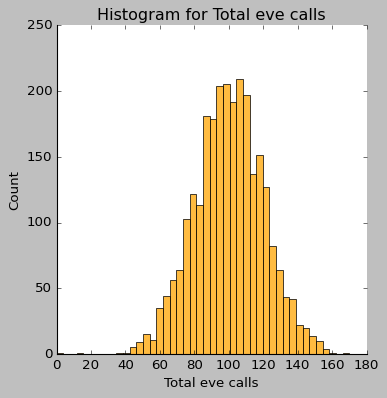

In [37]:
sns.displot(data=df['Total eve calls'],kind='hist',color='orange');
plt.title('Histogram for Total eve calls');

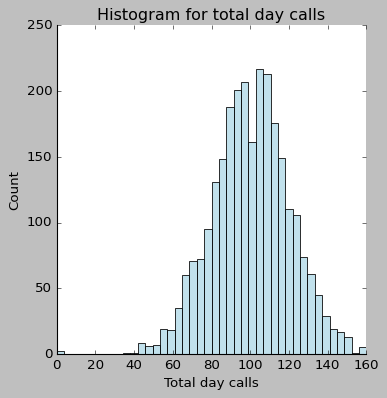

In [40]:
sns.displot(data=df['Total day calls'],kind='hist',color='lightblue');
plt.title('Histogram for total day calls');

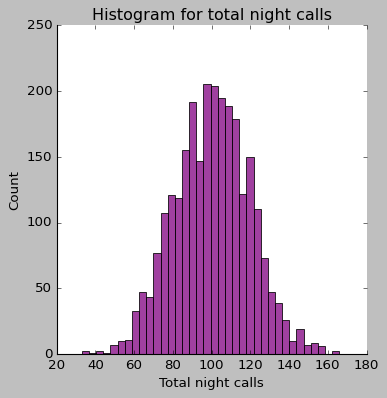

In [38]:
sns.displot(data=df['Total night calls'],kind='hist',color='purple');
plt.title('Histogram for total night calls');

- More calls are made in day time than evening 
- Less calls are made in day time when compared with night calls

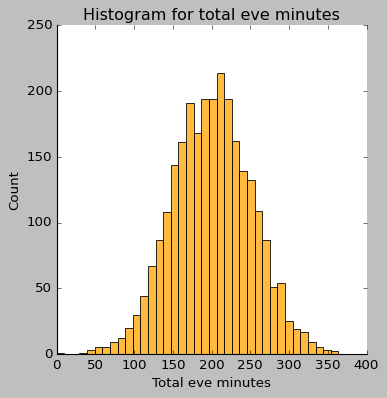

In [41]:
sns.displot(data=df['Total eve minutes'],kind = 'hist',color='orange');
plt.title('Histogram for total eve minutes');

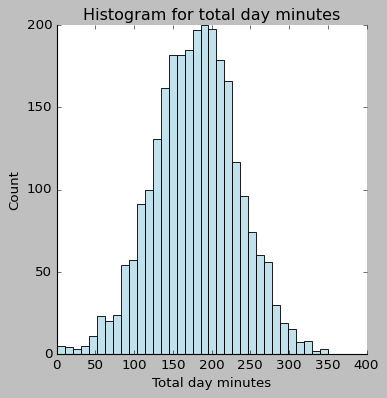

In [42]:
sns.displot(data=df['Total day minutes'],kind = 'hist',color='lightblue');
plt.title('Histogram for total day minutes');

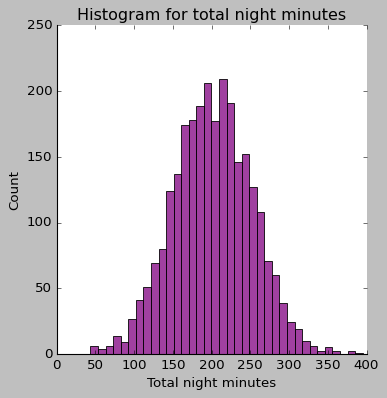

In [43]:
sns.displot(data=df['Total night minutes'],kind = 'hist',color='purple');
plt.title('Histogram for total night minutes');

- Eventhough day calls were made most,customers tend to talk lesser time
- Evening and night calls made by customers have higher minutes when compared with day call duration

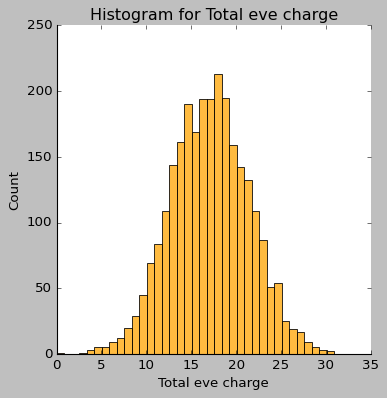

In [47]:
sns.displot(data=df['Total eve charge'],kind='hist',color='orange');
plt.title('Histogram for Total eve charge');

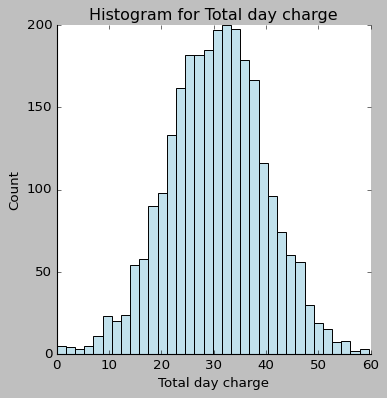

In [46]:
sns.displot(data=df['Total day charge'],kind='hist',color='lightblue');
plt.title('Histogram for Total day charge');

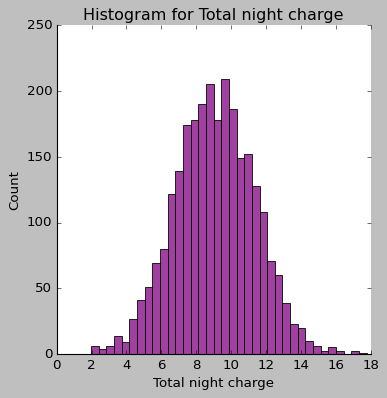

In [48]:
sns.displot(data=df['Total night charge'],kind='hist',color='purple');
plt.title('Histogram for Total night charge');

- Despite the lower duration of calls during day time,the charges were made higher
- While in evening the charges are half that of daytime call charges
- For night calls the charges are even lesser than any other time

# Bivariate analysis

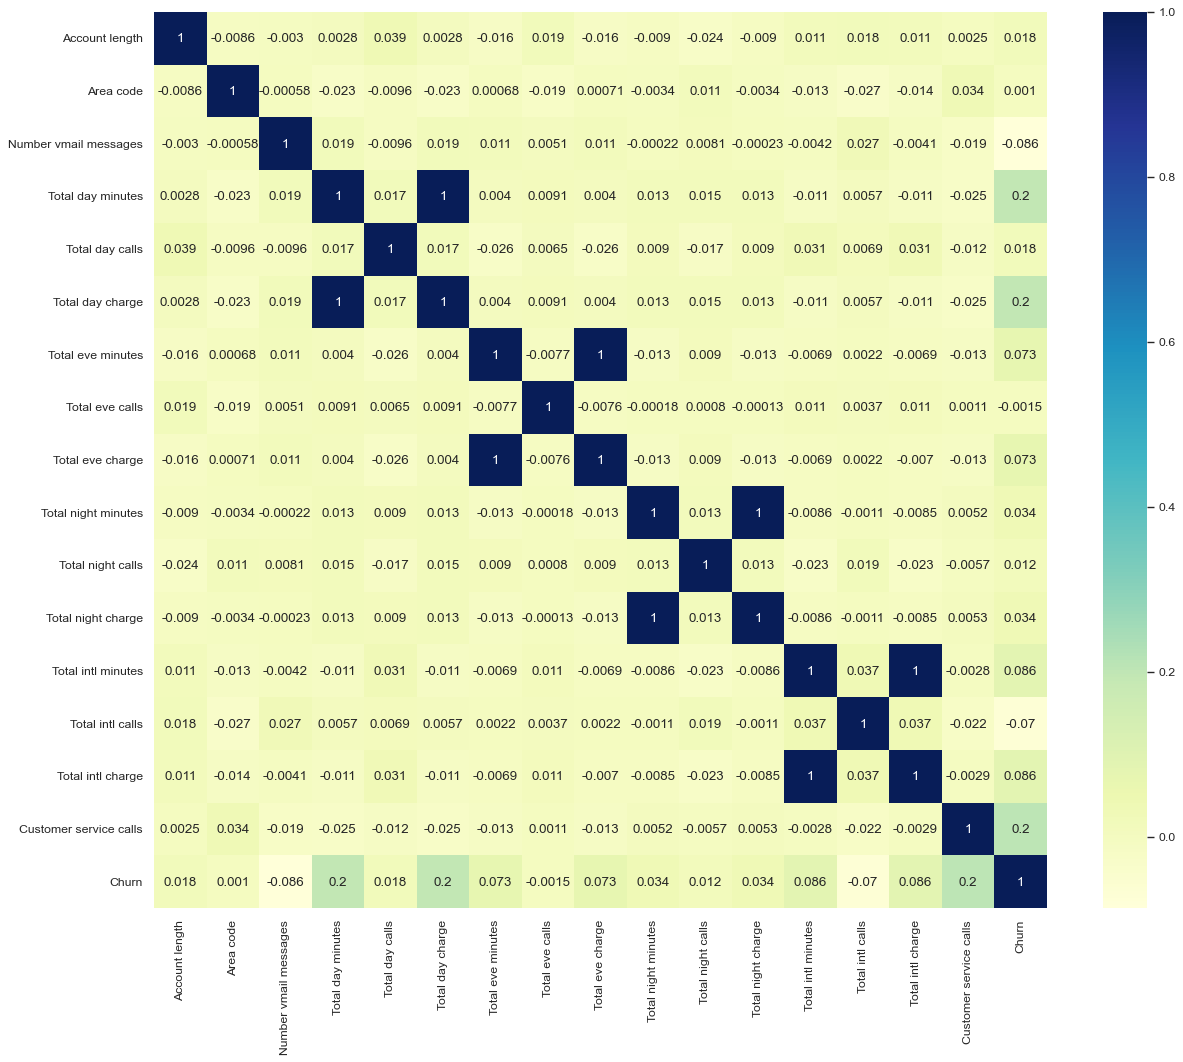

In [56]:
sns.set(rc={'figure.figsize':(18,14)})
sns.heatmap(data=df.corr(numeric_only=True),annot=True,cmap='YlGnBu');

- No much Correlation found between independent and dependent variables
- Total minutes spoken in all times and all types of call is highly positively correlated with Charges made respectively

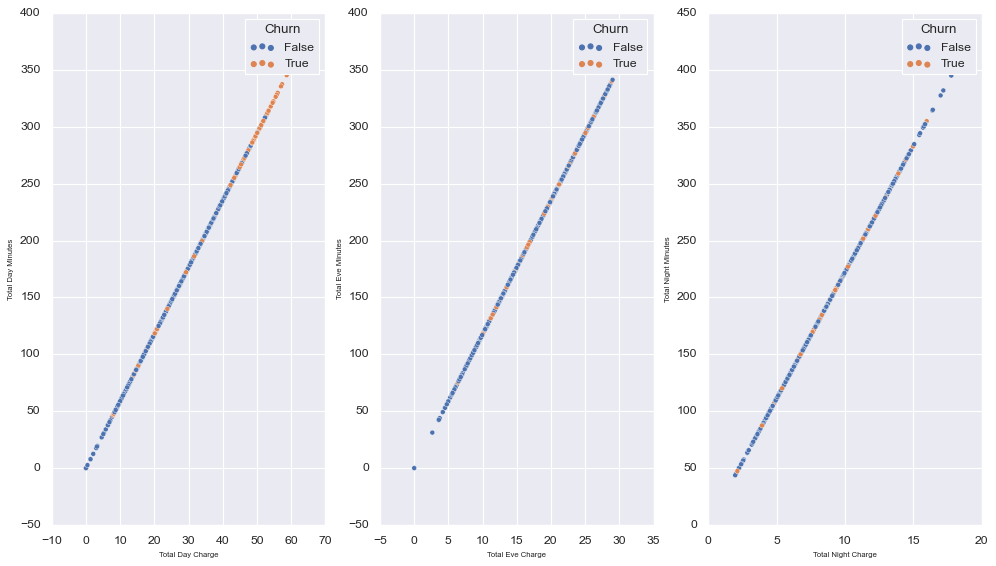

In [58]:
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
sns.scatterplot(data = df, x = 'Total day charge', y = 'Total day minutes',hue = 'Churn')
plt.xlabel('Total Day Charge', fontsize = 7)
plt.ylabel('Total Day Minutes', fontsize = 7)

plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'Total eve charge', y = 'Total eve minutes',hue = 'Churn')
plt.xlabel('Total Eve Charge', fontsize = 7)
plt.ylabel('Total Eve Minutes', fontsize = 7)

plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'Total night charge', y = 'Total night minutes',hue = 'Churn')
plt.xlabel('Total Night Charge', fontsize = 7)
plt.ylabel('Total Night Minutes', fontsize = 7);


- Churn rate is higher for day callers 
- when compared with evening and night callers

### Multivariate analysis

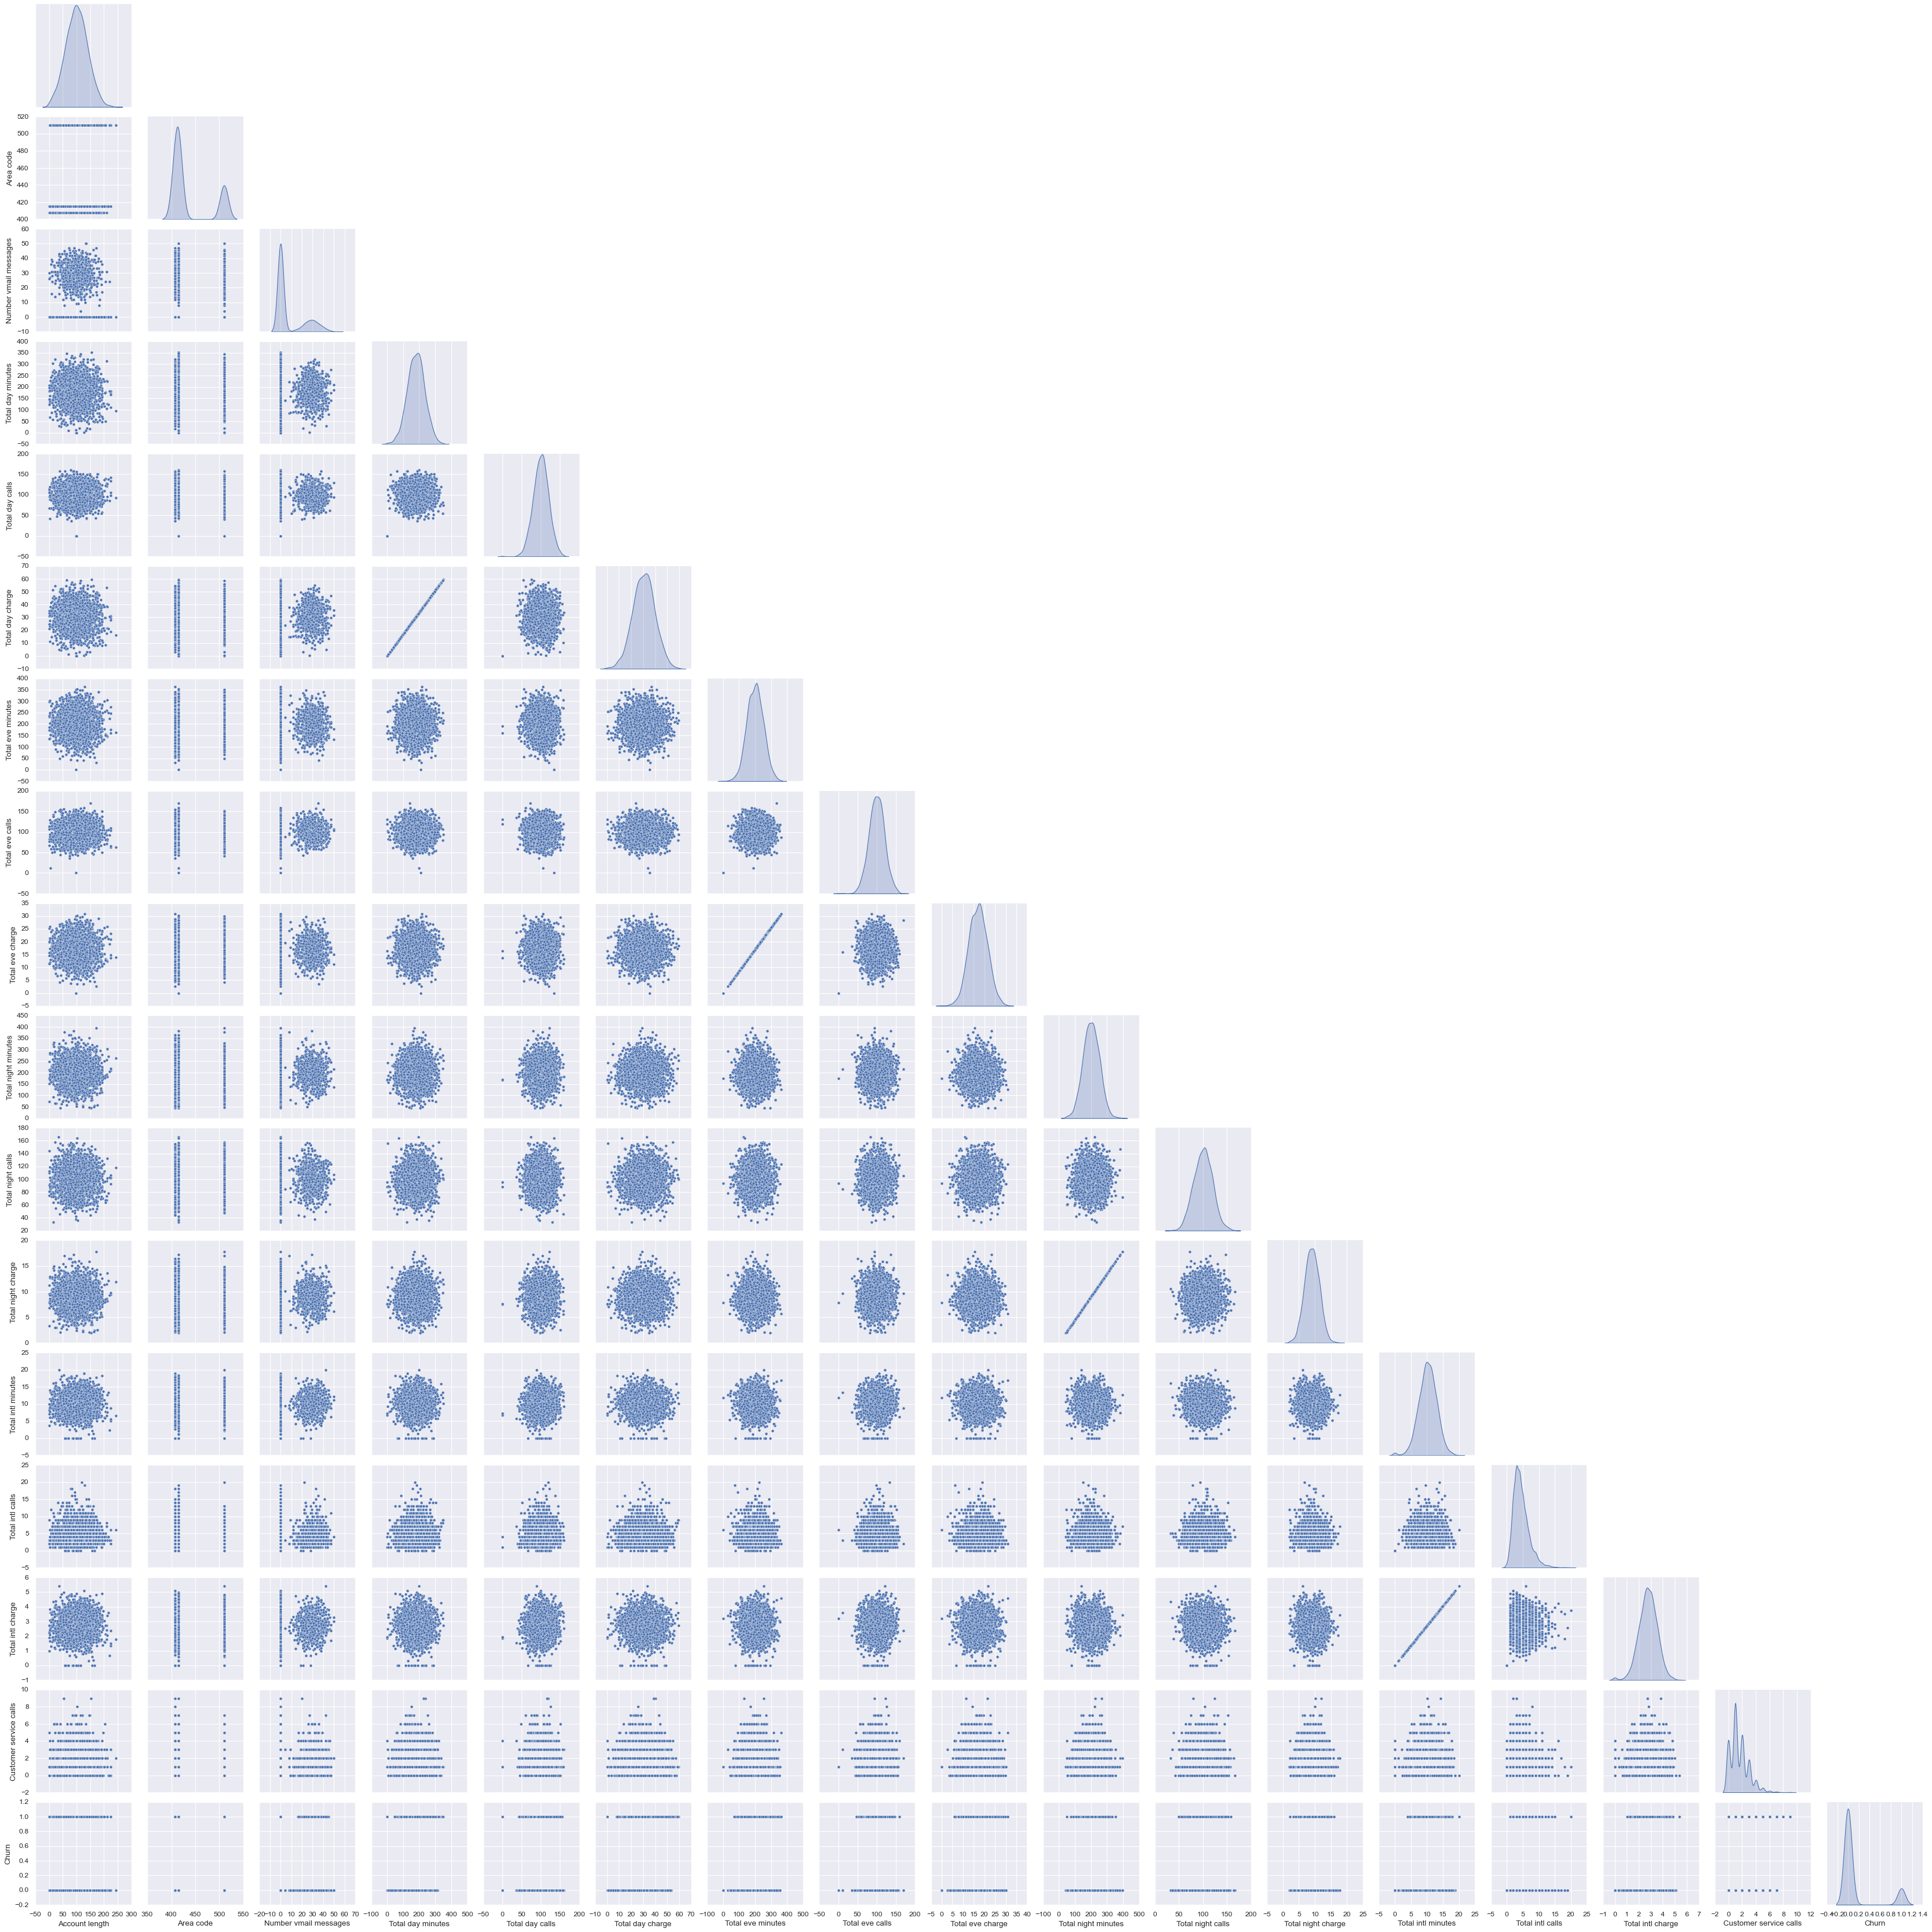

In [59]:
sns.pairplot(data=df,corner=True,diag_kind='kde');

- Mostly all are normally distributed except customer service calls,area code,number vmail messages
- Perfect linear relationship between minutes and charges

### Feature Engineering

In [63]:
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [64]:
df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [65]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

- OneHotEncoding International plan and voice mail plan features

In [68]:
int_plan = pd.get_dummies(df['International plan'],prefix='int_plan')

In [71]:
voice_plan = pd.get_dummies(df['Voice mail plan'],prefix='voice_plan')

In [73]:
df = pd.concat((df,int_plan,voice_plan),axis=1)

In [74]:
df.isna().any()

State                     False
Account length            False
Area code                 False
International plan        False
Voice mail plan           False
Number vmail messages     False
Total day minutes         False
Total day calls           False
Total day charge          False
Total eve minutes         False
Total eve calls           False
Total eve charge          False
Total night minutes       False
Total night calls         False
Total night charge        False
Total intl minutes        False
Total intl calls          False
Total intl charge         False
Customer service calls    False
Churn                     False
int_plan_No               False
int_plan_Yes              False
voice_plan_No             False
voice_plan_Yes            False
dtype: bool

<AxesSubplot: >

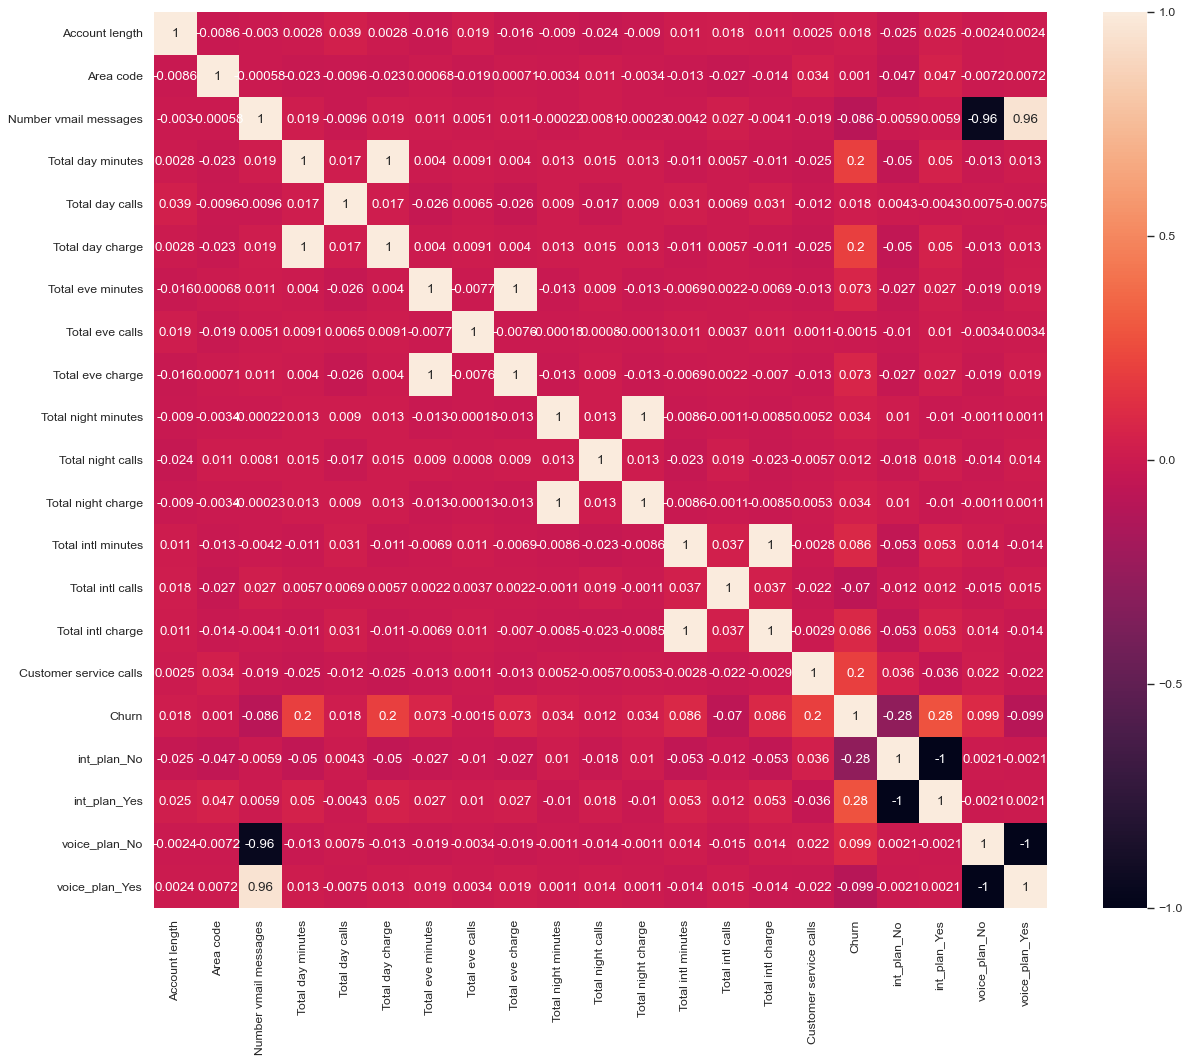

In [75]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True)

- Total day minutes,Customer service calls,int_plan_yes

In [81]:
Model = LogisticRegression()

In [118]:
X = df[['Total day minutes','Customer service calls','int_plan_Yes']]
y = df[['Churn']]

In [85]:
sc = StandardScaler()

In [86]:
X = pd.DataFrame(sc.fit_transform(X))

In [88]:
X.columns = [['Total day minutes','Customer service calls','int_plan_Yes']]

In [89]:
X.head()

,Total day minutes,Customer service calls,int_plan_Yes
0,1.579670,-0.429172,-0.335690
1,-0.329918,-0.429172,-0.335690
2,1.179302,-1.191955,-0.335690
3,2.212509,0.333610,2.978938
4,-0.235822,1.096392,2.978938


In [95]:
le = LabelEncoder()

In [96]:
y = pd.DataFrame(le.fit_transform(y))

C:\Users\balaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
y.columns = ['Churn']

In [101]:
Model.fit(X,y)

C:\Users\balaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [117]:
decision = DecisionTreeClassifier(max_depth=3,random_state=111)

In [119]:
decision.fit(X,y)

DecisionTreeClassifier(max_depth=3, random_state=111)

# Test Dataset

In [107]:
test = pd.read_csv('churn-bigml-20.csv')

In [108]:
int_plan = pd.get_dummies(test['International plan'],prefix='int_plan')

In [109]:
test = test[['Total day minutes','Customer service calls','Churn']]

In [110]:
test = pd.concat((test,int_plan['int_plan_Yes']),axis=1)

In [111]:
test.head()

,Total day minutes,Customer service calls,Churn,int_plan_Yes
0,184.5,1,False,0
1,129.1,4,True,0
2,332.9,4,True,0
3,110.4,2,False,0
4,119.3,1,False,0


In [120]:
X_test = test[['Total day minutes','Customer service calls','int_plan_Yes']]
y_test = test[['Churn']]

In [113]:
y = pd.DataFrame(le.fit_transform(y))

C:\Users\balaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
Model.score(X_test,y)

C:\Users\balaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.1424287856071964

In [121]:
decision.score(X_test,y_test)

0.896551724137931